In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

%matplotlib inline

np.random.seed(1) #set a seed so that the results are consistent

In [2]:
#加载你所需要的数据集

def load_planar_dataset():
    np.random.seed(1)
    m=400   #样本数量
    N=int(m/2)   #每个类别的样本量
    D=2  #维度数
    X=np.zeros((m,D))  #初始化X
    Y = np.zeros((m,1), dtype='uint8') # 初始化Y
    a=4  #花儿的最大长度
    
    for j in range(2):
        ix=range(N*j,N*(j+1))
        t=np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2  #theta
        r=a*np.sin(4*t)+np.random.randn(N)*0.2  #radius
        X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
        Y[ix]=j
        
    X=X.T
    Y=Y.T
    
    return X,Y


X,Y=load_planar_dataset()

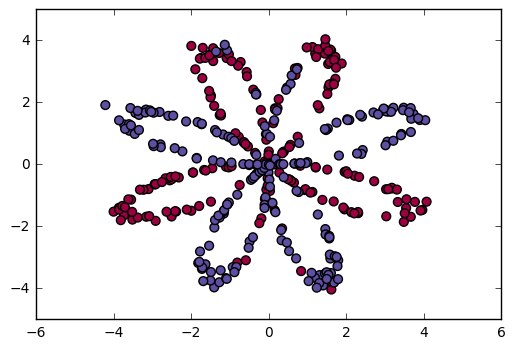

In [3]:
#查看这个数据集
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [4]:
#查看数据集的大小
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [5]:
def layer_sizes(X,Y):
    '''
    Arguments:
    X -- input dataset of shape(input size,number of examples)
    Y -- labels of shape(output size,number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    
    '''
    
    n_x=X.shape[0]
    n_y=Y.shape[0]
    n_h=4
    
    return (n_x,n_h,n_y)

In [6]:
#初始化模型参数
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    
    W1=np.random.randn(n_h,n_x)
    b1=np.random.randn(n_h,1)
    W2=np.random.randn(n_y,n_h)
    b2=np.random.randn(n_y,1)
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
        
    }
    
    return parameters

In [7]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[-1.05795222]
 [-0.90900761]
 [ 0.55145404]
 [ 2.29220801]]
W2 = [[ 0.04153939 -1.11792545  0.53905832 -0.5961597 ]]
b2 = [[-0.0191305]]


In [8]:
#向前传播

def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=np.tanh(Z2)
    
    assert(A2.shape==(1,X.shape[1]))
    
    cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return A2,cache

In [9]:
#计算代价函数
def compute_cost(A2,Y,parameters):
        m=Y.shape[1]
        
        logprobs=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
        cost=-(1.0/m)*np.sum(logprobs)
        
        cost=np.squeeze(cost)
        
        assert(isinstance(cost,float))
        
        return cost

In [10]:
#向后传播
def backward_propagation(parameters,cache,X,Y):
    
    
    m=X.shape[1]
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=1.0/m * np.dot(dZ2,A1.T)
    db2=1.0/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=1.0/m*np.dot(dZ1,X.T)
    db1=1.0/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    
    return grads

In [11]:
#更新参数

def update_parameters(parameters,grads,learning_rate=1.2):
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters

In [12]:
#NN模型

def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    for i in range(0,num_iterations):
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads,learning_rate=1.2)
        
        if( print_cost and i%1000==0):
            print("Cost after iteration %i:%f" %(i,cost))
        
    return parameters

In [13]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions=(A2>0.5)
    
    return predictions

C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


Cost after iteration 0:nan
Cost after iteration 1000:nan
Cost after iteration 2000:nan
Cost after iteration 3000:nan
Cost after iteration 4000:nan
Cost after iteration 5000:nan
Cost after iteration 6000:nan
Cost after iteration 7000:nan
Cost after iteration 8000:nan
Cost after iteration 9000:nan


C:\Users\石宝荣\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\石宝荣\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


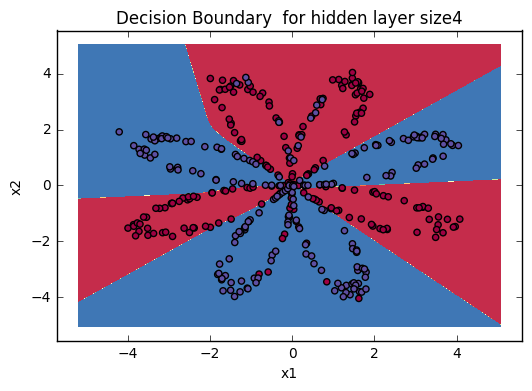

In [14]:
parameters=nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)

plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
plt.title("Decision Boundary  for hidden layer size"+str(4))


In [15]:
#打印准确度
predictions=predict(parameters,X)
print('Accuracy : %d' %float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)+'%')

Accuracy : 89%


C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log
C:\Users\石宝荣\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\石宝荣\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy for 1 hidden units:65.5%
Accuracy for 2 hidden units:72.0%
Accuracy for 3 hidden units:88.0%
Accuracy for 4 hidden units:88.75%
Accuracy for 5 hidden units:87.75%
Accuracy for 20 hidden units:89.5%


C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in multiply


Accuracy for 50 hidden units:88.0%


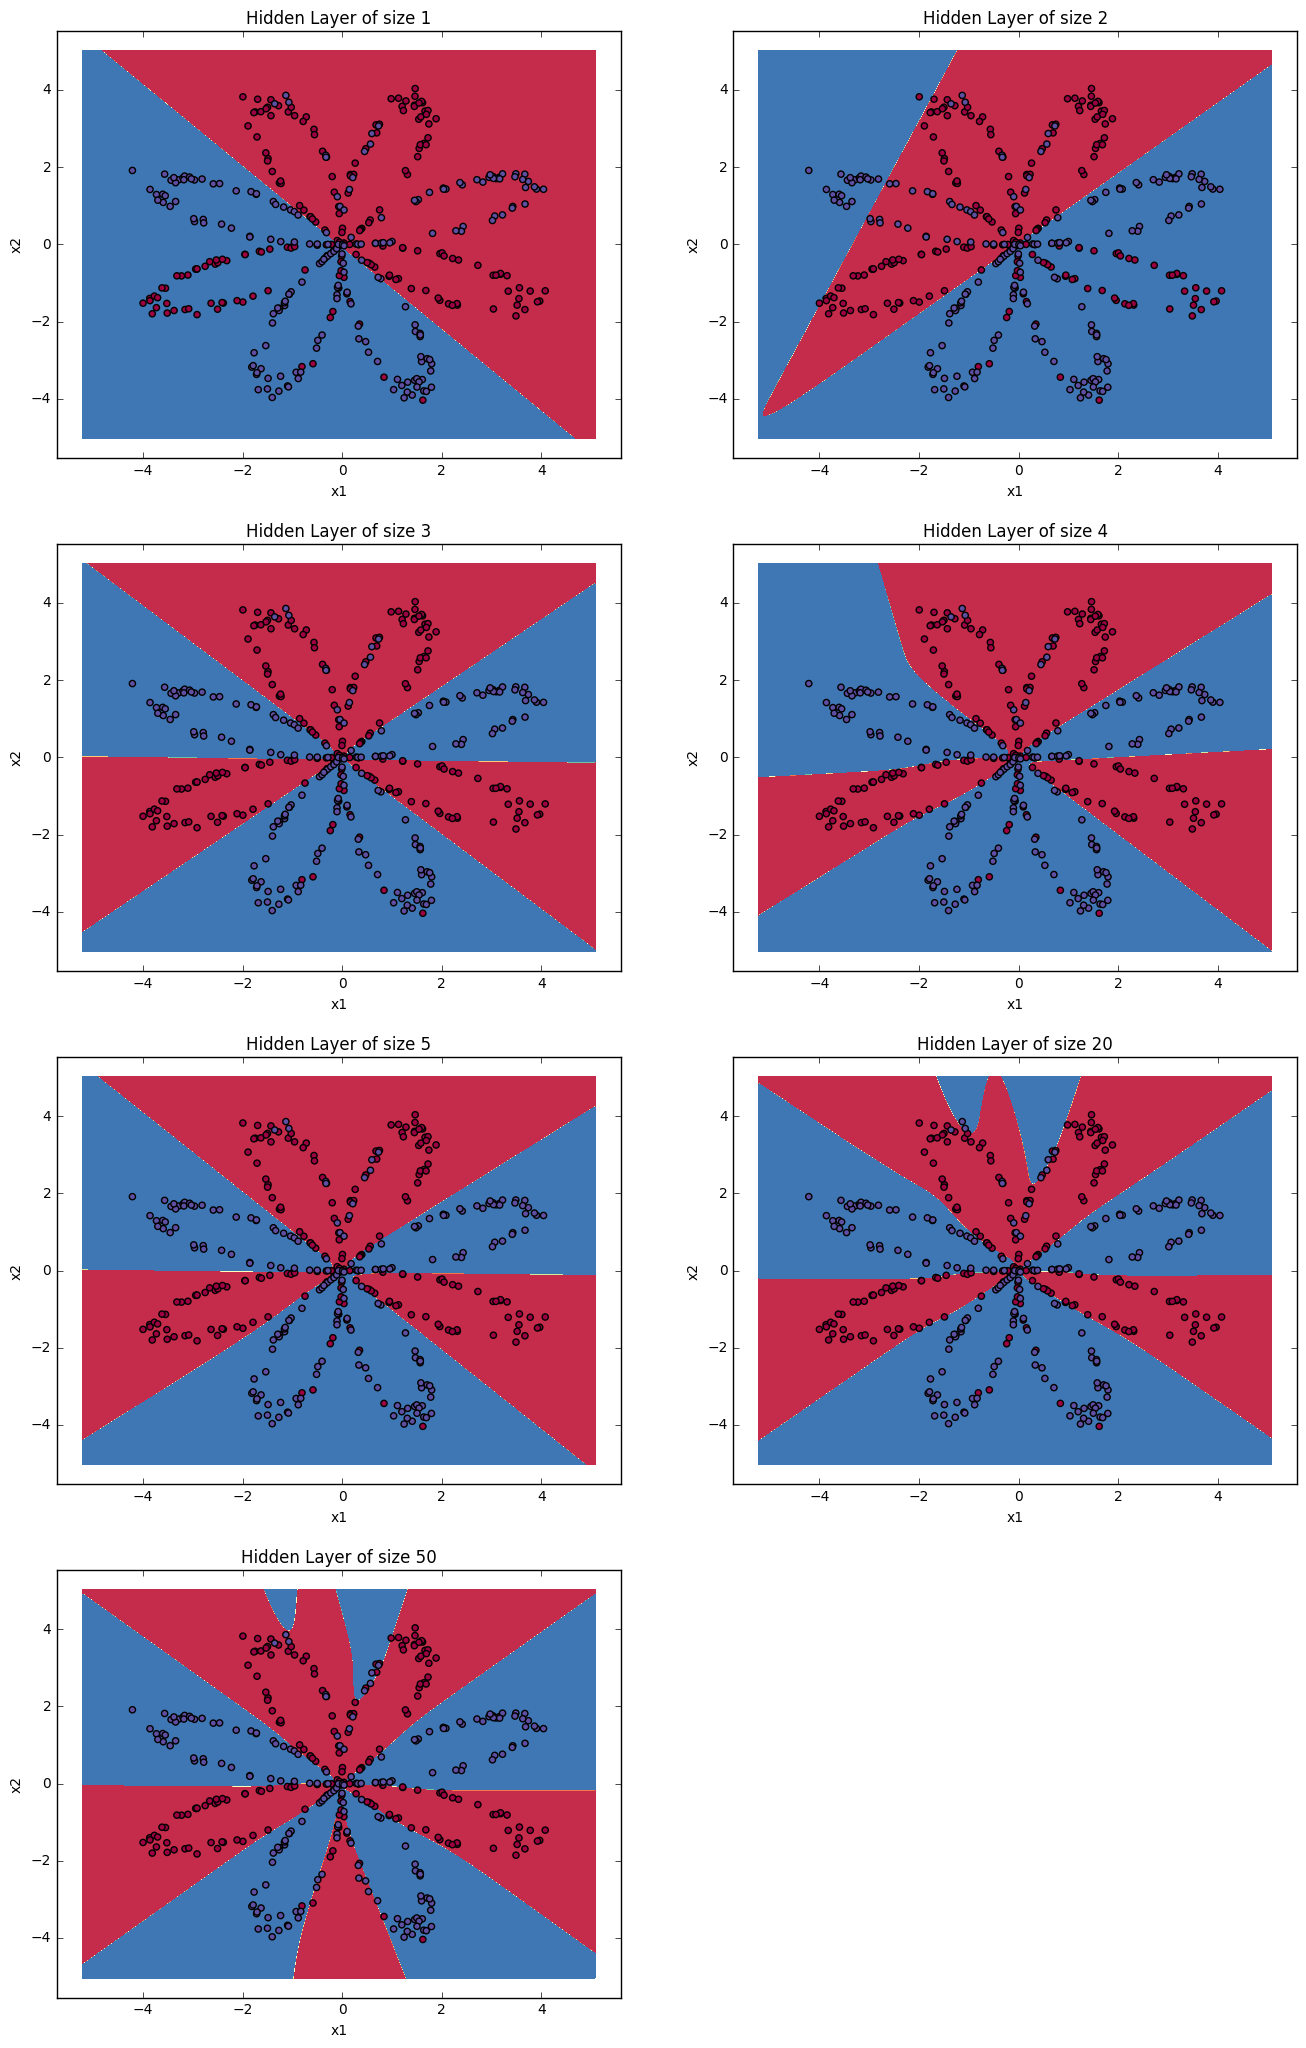

In [17]:
#测试不同隐藏层的准确率

plt.figure(figsize=(16,32))
hidden_layer_sizes=[1,2,3,4,5,20,50]
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title('Hidden Layer of size %d' %n_h)
    parameters=nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
    predictions=predict(parameters,X)
    accuracy=float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print("Accuracy for {} hidden units:{}%".format(n_h,accuracy))

In [ ]:
'''
结论：
  越大的模型能更好的拟合数据，直到最大的模型过拟合数据
  
'''